In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/global-ev-sales-2010-2024/IEA Global EV Data 2024.csv


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('/kaggle/input/global-ev-sales-2010-2024/IEA Global EV Data 2024.csv')
print('Dataset Columns:')
print(df.columns)
print('Dataset Info:')
df.info()
print('Dataset Head:')
df.head()

Dataset Columns:
Index(['region', 'category', 'parameter', 'mode', 'powertrain', 'year', 'unit',
       'value'],
      dtype='object')
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12654 entries, 0 to 12653
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   region      12654 non-null  object 
 1   category    12654 non-null  object 
 2   parameter   12654 non-null  object 
 3   mode        12654 non-null  object 
 4   powertrain  12654 non-null  object 
 5   year        12654 non-null  int64  
 6   unit        12654 non-null  object 
 7   value       12654 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 791.0+ KB
Dataset Head:


region    category       parameter  mode powertrain  year      unit  \
0  Australia  Historical  EV stock share  Cars         EV  2011   percent   
1  Australia  Historical  EV sales share  Cars         EV  2011   percent   
2  Australia  Historical        EV sales  Cars        BEV  2011  Vehicles   
3  Australia  Historical        EV stock  Cars        BEV  2011  Vehicles   
4  Australia  Historical        EV stock  Cars        BEV  2012  Vehicles   

       value  
0    0.00039  
1    0.00650  
2   49.00000  
3   49.00000  
4  220.00000

In [5]:
df.isnull().sum()

region        0
category      0
parameter     0
mode          0
powertrain    0
year          0
unit          0
value         0
dtype: int64

# Temporal Analysis

Temporal Analysis of EV Sales Evolution

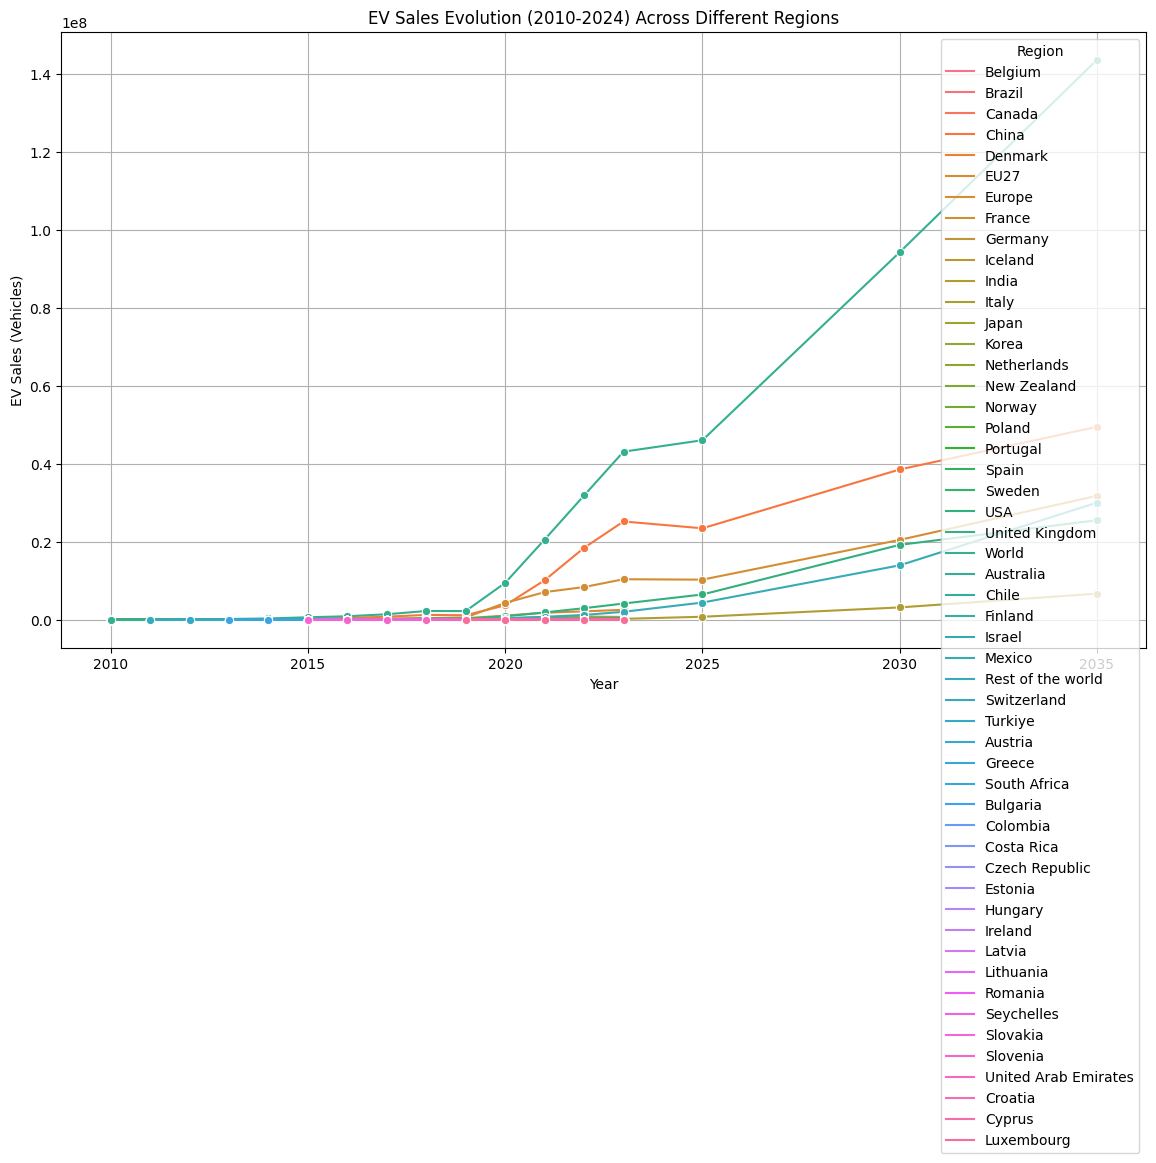

In [6]:
# Filter data for EV sales
ev_sales = df[df['parameter'] == 'EV sales']

# Group data by year and region for EV sales analysis
ev_sales_year_region = ev_sales.groupby(['year', 'region']).agg({'value': 'sum'}).reset_index()

# Plot EV sales evolution from 2010 to 2024 across different regions
plt.figure(figsize=(14, 8))
sns.lineplot(data=ev_sales_year_region, x='year', y='value', hue='region', marker='o')
plt.title('EV Sales Evolution (2010-2024) Across Different Regions')
plt.xlabel('Year')
plt.ylabel('EV Sales (Vehicles)')
plt.legend(title='Region')
plt.grid(True)
plt.show()

Temporal Analysis of EV Stock Evolution

In [7]:
# Filter data for EV stock
ev_stock = df[df['parameter'] == 'EV stock']

# Group data by year and region for EV stock analysis
ev_stock_year_region = ev_stock.groupby(['year', 'region']).agg({'value': 'sum'}).reset_index()

# Plot EV stock evolution from 2010 to 2024 across different regions
plt.figure(figsize=(14, 8))
sns.lineplot(data=ev_stock_year_region, x='year', y='value', hue='region', marker='o')
plt.title('EV Stock Evolution (2010-2024) Across Different Regions')
plt.xlabel('Year')
plt.ylabel('EV Stock (Vehicles)')
plt.legend(title='Region')
plt.grid(True)
plt.show()

Comparison between Projection-APS and Projection-STEPS

In [8]:
# Filter data for projections (APS and STEPS)
projection_aps = df[(df['category'] == 'Projection-APS') & (df['parameter'].isin(['EV sales', 'EV stock']))]
projection_steps = df[(df['category'] == 'Projection-STEPS') & (df['parameter'].isin(['EV sales', 'EV stock']))]

# Group data by year for Projection-APS
projection_aps_year = projection_aps.groupby(['year', 'parameter']).agg({'value': 'sum'}).reset_index()

# Group data by year for Projection-STEPS
projection_steps_year = projection_steps.groupby(['year', 'parameter']).agg({'value': 'sum'}).reset_index()

# Plot projected trends for EV adoption under APS
plt.figure(figsize=(14, 8))
sns.lineplot(data=projection_aps_year, x='year', y='value', hue='parameter', marker='o')
plt.title('Projected EV Adoption Trends under APS (2010-2024)')
plt.xlabel('Year')
plt.ylabel('Value (Vehicles)')
plt.legend(title='Parameter')
plt.grid(True)
plt.show()

# Plot projected trends for EV adoption under STEPS
plt.figure(figsize=(14, 8))
sns.lineplot(data=projection_steps_year, x='year', y='value', hue='parameter', marker='o')
plt.title('Projected EV Adoption Trends under STEPS (2010-2024)')
plt.xlabel('Year')
plt.ylabel('Value (Vehicles)')
plt.legend(title='Parameter')
plt.grid(True)
plt.show()

Temporal Analysis of EV Sales Share Evolution

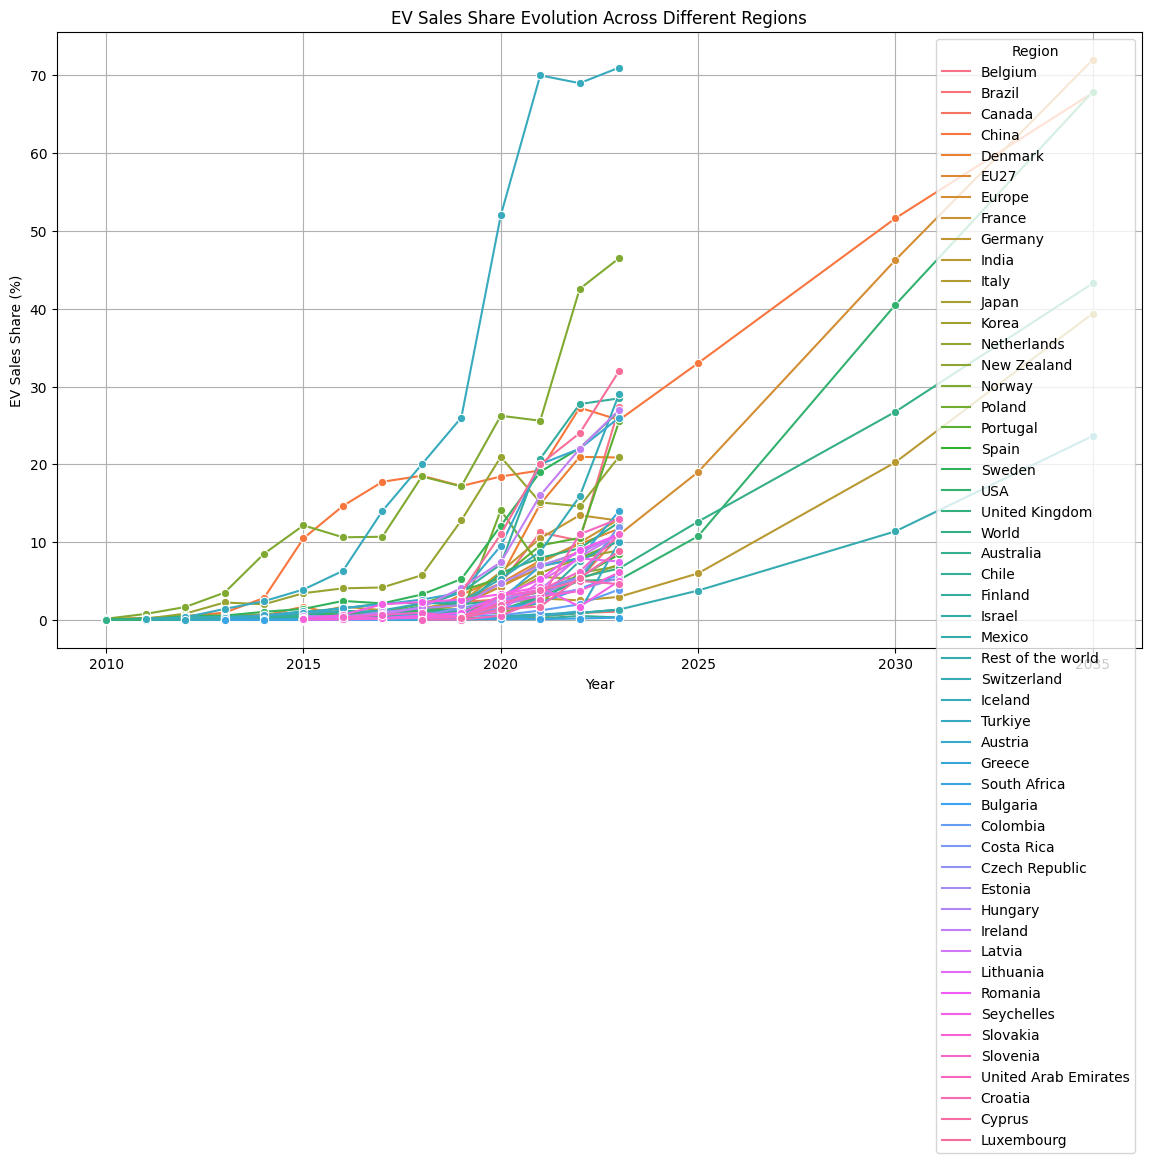

In [9]:
# Filter data for EV sales share
ev_sales_share = df[df['parameter'] == 'EV sales share']

# Group data by year and region for EV sales share analysis
ev_sales_share_year_region = ev_sales_share.groupby(['year', 'region']).agg({'value': 'mean'}).reset_index()

# Plot EV sales share evolution from 2010 across different regions
plt.figure(figsize=(14, 8))
sns.lineplot(data=ev_sales_share_year_region, x='year', y='value', hue='region', marker='o')
plt.title('EV Sales Share Evolution Across Different Regions')
plt.xlabel('Year')
plt.ylabel('EV Sales Share (%)')
plt.legend(title='Region')
plt.grid(True)
plt.show()

Temporal Analysis of EV Stock Share Evolution

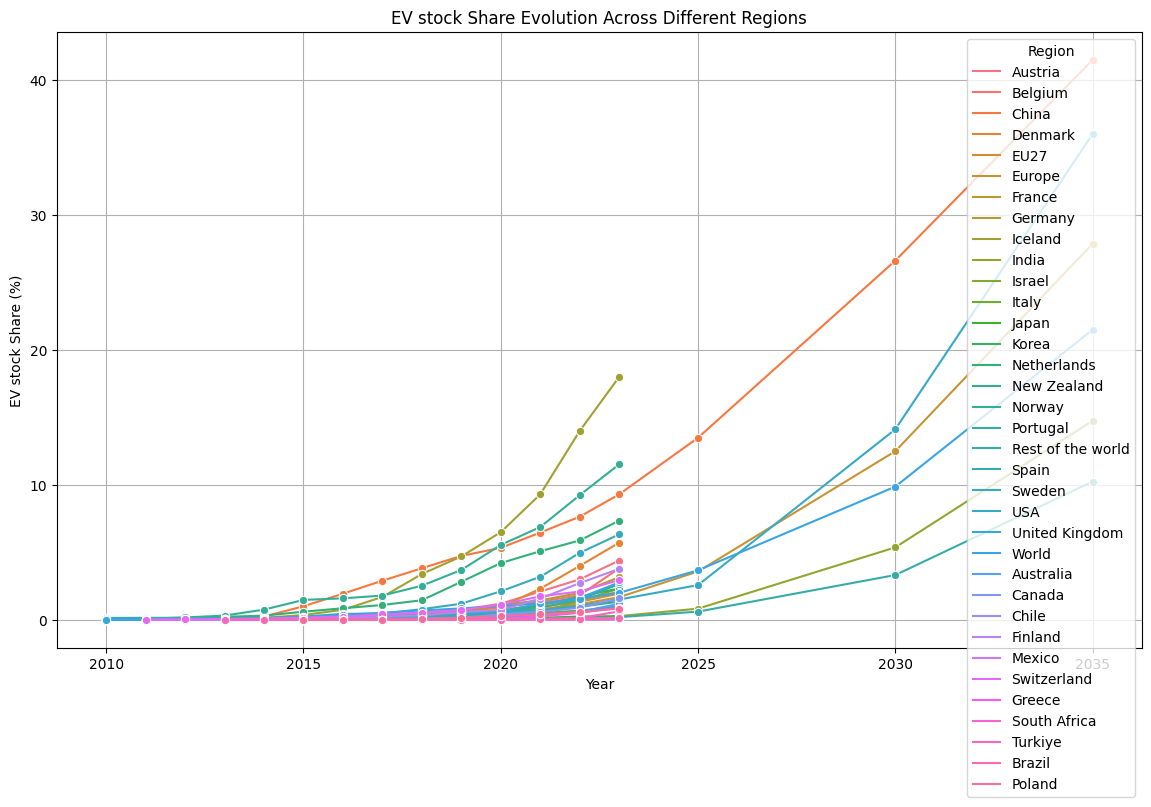

In [10]:
# Filter data for EV stock share
ev_stock_share = df[df['parameter'] == 'EV stock share']

# Group data by year and region for EV stock share analysis
ev_stock_share_year_region = ev_stock_share.groupby(['year', 'region']).agg({'value': 'mean'}).reset_index()

# Plot EV stock share evolution from 2010 across different regions
plt.figure(figsize=(14, 8))
sns.lineplot(data=ev_stock_share_year_region, x='year', y='value', hue='region', marker='o')
plt.title('EV stock Share Evolution Across Different Regions')
plt.xlabel('Year')
plt.ylabel('EV stock Share (%)')
plt.legend(title='Region')
plt.grid(True)
plt.show()

# Year

In [11]:
# Aggregate sales by year
sales_by_year = df.groupby('year')['value'].sum().reset_index()

# Plot trend
plt.figure(figsize=(12, 8))
sns.lineplot(x='year', y='value', data=sales_by_year, marker='o', color='b', linewidth=2.5)
plt.title('EV Sales Trend Over the Years', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Sales', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.show()

# Regional Analysis

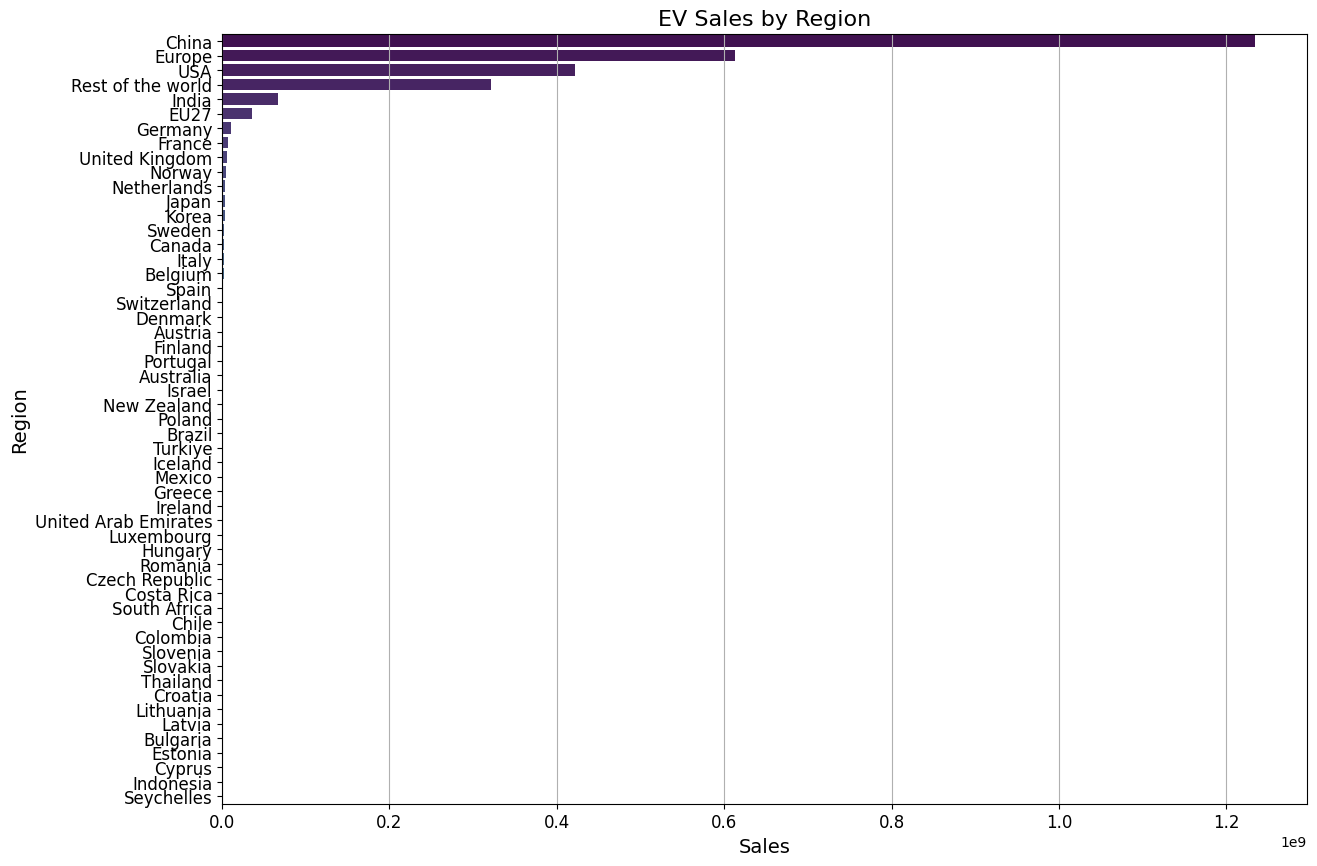

In [12]:
# Filter out the 'World' region
df = df[df["region"] != "World"]

# Aggregate sales by region
sales_by_region = df.groupby('region')['value'].sum().sort_values(ascending=False).reset_index()

# Plot bar chart
plt.figure(figsize=(14, 10))
sns.barplot(x='value', y='region', data=sales_by_region, palette='viridis')
plt.title('EV Sales by Region', fontsize=16)
plt.xlabel('Sales', fontsize=14)
plt.ylabel('Region', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x')
plt.show()

In [13]:
# Aggregate sales by region and year
sales_by_region_year = df.groupby(['region', 'year'])['value'].sum().reset_index()

# Plot line chart
plt.figure(figsize=(20, 14))
sns.lineplot(x='year', y='value', hue='region', data=sales_by_region_year, marker='o', linewidth=2.5, palette='tab10')
plt.title('EV Sales by Regions Over the Years', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Values', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Region', fontsize=12, title_fontsize=14)
plt.grid(True)
plt.show()

Regions with the Highest EV Adoption Rates

In [14]:
# Filter data for EV stock share
ev_stock_share = df[df['parameter'] == 'EV stock share']

# Group data by region to calculate the average EV stock share
ev_stock_share_region = ev_stock_share.groupby('region').agg({'value': 'mean'}).reset_index()

# Sort regions by EV stock share
ev_stock_share_region = ev_stock_share_region.sort_values(by='value', ascending=False)

# Plot regions with the highest EV adoption rates
plt.figure(figsize=(12, 6))
sns.barplot(data=ev_stock_share_region, x='value', y='region', palette='viridis')
plt.title('Regions with the Highest EV Adoption Rates')
plt.xlabel('Average EV Stock Share (%)')
plt.ylabel('Region')
plt.show()

Regional Comparison in Terms of EV Sales, Stock, and Charging Infrastructure

1. EV Sales and Stock by Region

In [15]:
# Filter data for EV sales and stock
ev_sales_stock = df[df['parameter'].isin(['EV sales', 'EV stock'])]

# Group data by region and parameter for EV sales and stock
ev_sales_stock_region = ev_sales_stock.groupby(['region', 'parameter']).agg({'value': 'sum'}).reset_index()

# Plot EV sales and stock by region
plt.figure(figsize=(14, 8))
sns.barplot(data=ev_sales_stock_region, x='value', y='region', hue='parameter', palette='Set2')
plt.title('EV Sales and Stock by Region')
plt.xlabel('Values')
plt.ylabel('Region')
plt.legend(title='Parameter')
plt.show()

2. EV Charging Infrastructure by Region

In [16]:
# Filter data for EV charging points
ev_charging_points = df[df['parameter'] == 'EV charging points']

# Group data by region for EV charging infrastructure
ev_charging_points_region = ev_charging_points.groupby('region').agg({'value': 'sum'}).reset_index()

# Sort regions by EV charging points
ev_charging_points_region = ev_charging_points_region.sort_values(by='value', ascending=False)

# Plot EV charging infrastructure by region
plt.figure(figsize=(12, 6))
sns.barplot(data=ev_charging_points_region, x='value', y='region', palette='coolwarm')
plt.title('EV Charging Infrastructure by Region')
plt.xlabel('Values')
plt.ylabel('Region')
plt.show()

Regional Differences in Powertrain Preferences

In [17]:
# Filter data for powertrain preferences
powertrain_preferences = df[df['powertrain'].isin(['BEV', 'PHEV', 'FCEV'])]

# Group data by region and powertrain to analyze preferences
powertrain_region = powertrain_preferences.groupby(['region', 'powertrain']).agg({'value': 'sum'}).reset_index()

# Plot powertrain preferences by region
plt.figure(figsize=(14, 8))
sns.barplot(data=powertrain_region, x='value', y='region', hue='powertrain', palette='Accent')
plt.title('Regional Differences in Powertrain Preferences (BEV vs. PHEV vs. FCEV)')
plt.xlabel('Values')
plt.ylabel('Region')
plt.legend(title='Powertrain')
plt.show()

Time series analysis of EV sales by region

In [18]:
# Filter data for EV sales and group by year and region
ev_sales_time_region = ev_sales.groupby(['year', 'region']).agg({'value': 'sum'}).reset_index()

# Plot EV sales over time for specific regions
regions_of_interest = ['Europe', 'China', 'USA']
plt.figure(figsize=(14, 8))
sns.lineplot(data=ev_sales_time_region[ev_sales_time_region['region'].isin(regions_of_interest)], 
             x='year', y='value', hue='region', marker='o')
plt.title('EV Sales Over Time for Selected Regions')
plt.xlabel('Year')
plt.ylabel('EV Sales (Vehicles)')
plt.grid(True)
plt.legend(title='Region')
plt.show()

# Category Analysis

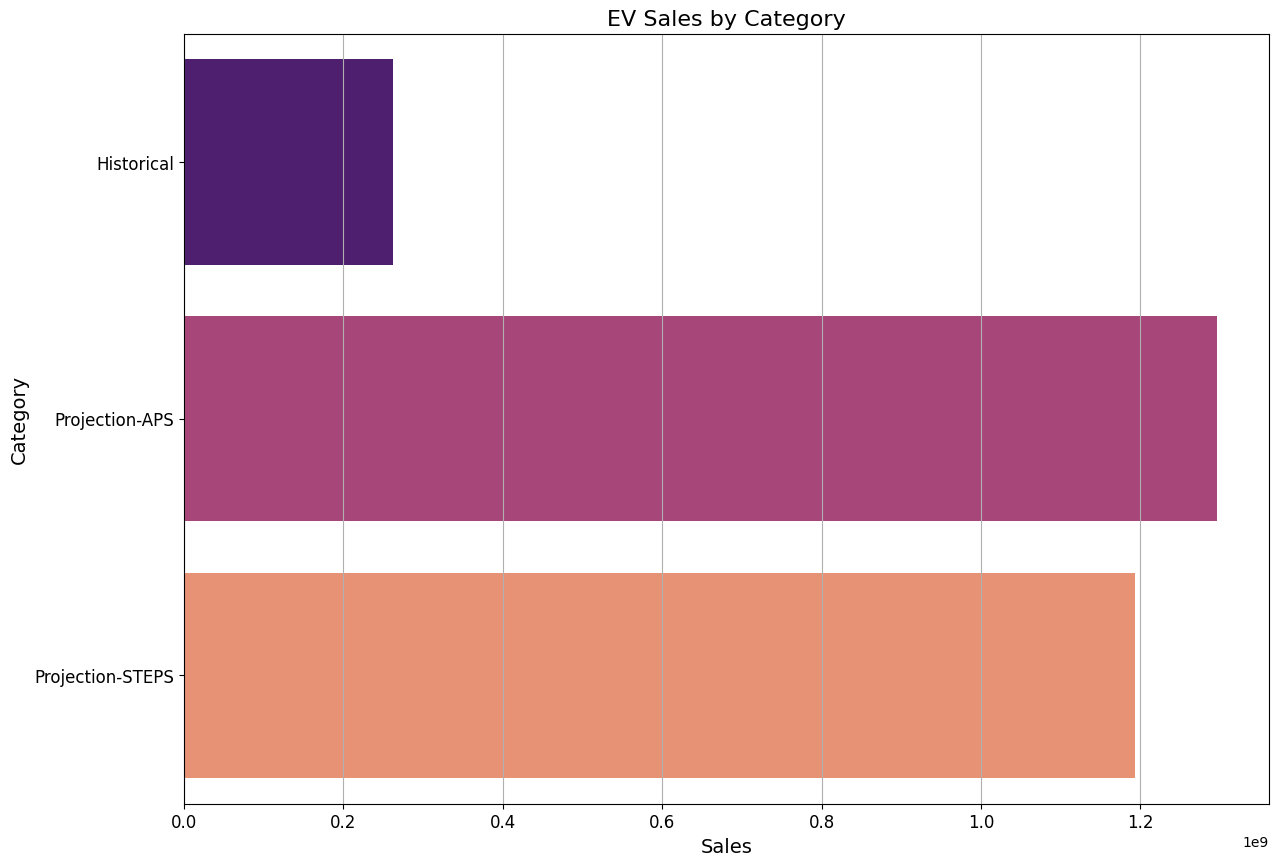

In [19]:
# Aggregate sales by category
sales_by_category = df.groupby('category')['value'].sum().reset_index()

# Plot bar chart
plt.figure(figsize=(14, 10))
sns.barplot(x='value', y='category', data=sales_by_category, palette='magma')
plt.title('EV Sales by Category', fontsize=16)
plt.xlabel('Sales', fontsize=14)
plt.ylabel('Category', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x')
plt.show()

In [20]:
# Aggregate sales by category and year
sales_by_category_year = df.groupby(['category', 'year'])['value'].sum().reset_index()

# Plot line chart
plt.figure(figsize=(20, 14))
sns.lineplot(x='year', y='value', hue='category', data=sales_by_category_year, marker='o', linewidth=2.5, palette='tab10')
plt.title('EV Sales by Categories Over the Years', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Values', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Category', fontsize=12, title_fontsize=14)
plt.grid(True)
plt.show()

Comparing Historical Data and Projections

1. EV Sales Growth

In [21]:
# Filter data for EV sales in historical data and projections
ev_sales_category = df[(df['parameter'] == 'EV sales') & (df['category'].isin(['Historical', 'Projection-APS', 'Projection-STEPS']))]

# Group data by year and category for EV sales
ev_sales_category_grouped = ev_sales_category.groupby(['year', 'category']).agg({'value': 'sum'}).reset_index()

# Plot EV sales growth comparing historical data and projections
plt.figure(figsize=(14, 8))
sns.lineplot(data=ev_sales_category_grouped, x='year', y='value', hue='category', marker='o', palette='tab10')
plt.title('EV Sales Growth: Historical Data vs. Projections (APS vs. STEPS)')
plt.xlabel('Year')
plt.ylabel('EV Sales (Vehicles)')
plt.legend(title='Category')
plt.grid(True)
plt.show()

2. EV Stock Growth

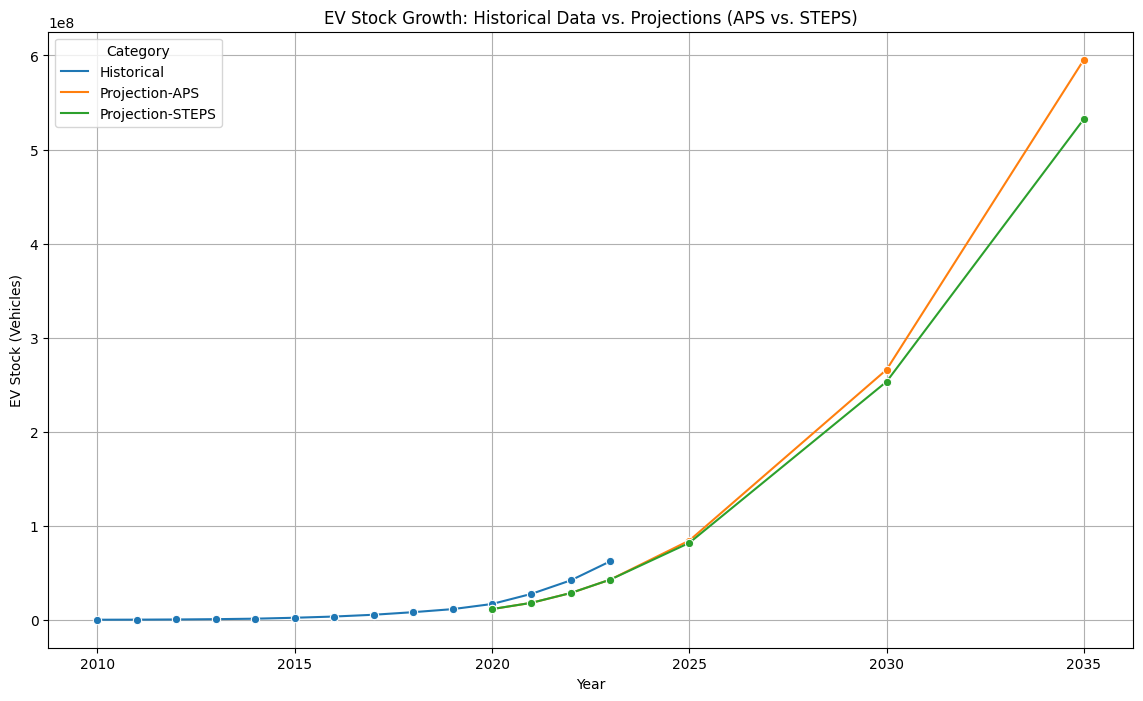

In [22]:
# Filter data for EV stock in historical data and projections
ev_stock_category = df[(df['parameter'] == 'EV stock') & (df['category'].isin(['Historical', 'Projection-APS', 'Projection-STEPS']))]

# Group data by year and category for EV stock
ev_stock_category_grouped = ev_stock_category.groupby(['year', 'category']).agg({'value': 'sum'}).reset_index()

# Plot EV stock growth comparing historical data and projections
plt.figure(figsize=(14, 8))
sns.lineplot(data=ev_stock_category_grouped, x='year', y='value', hue='category', marker='o', palette='tab10')
plt.title('EV Stock Growth: Historical Data vs. Projections (APS vs. STEPS)')
plt.xlabel('Year')
plt.ylabel('EV Stock (Vehicles)')
plt.legend(title='Category')
plt.grid(True)
plt.show()

Insights from Comparing Historical Trends with Future Projections

1. EV Sales Share

In [23]:
# Filter data for EV sales share in historical data and projections
ev_sales_share_category = df[(df['parameter'] == 'EV sales share') & (df['category'].isin(['Historical', 'Projection-APS', 'Projection-STEPS']))]

# Group data by year and category for EV sales share
ev_sales_share_category_grouped = ev_sales_share_category.groupby(['year', 'category']).agg({'value': 'mean'}).reset_index()

# Plot EV sales share comparing historical data and projections
plt.figure(figsize=(14, 8))
sns.lineplot(data=ev_sales_share_category_grouped, x='year', y='value', hue='category', marker='o', palette='tab10')
plt.title('EV Sales Share: Historical Data vs. Projections (APS vs. STEPS)')
plt.xlabel('Year')
plt.ylabel('EV Sales Share (%)')
plt.legend(title='Category')
plt.grid(True)
plt.show()

2. EV Stock Share

In [24]:
# Filter data for EV stock share in historical data and projections
ev_stock_share_category = df[(df['parameter'] == 'EV stock share') & (df['category'].isin(['Historical', 'Projection-APS', 'Projection-STEPS']))]

# Group data by year and category for EV stock share
ev_stock_share_category_grouped = ev_stock_share_category.groupby(['year', 'category']).agg({'value': 'mean'}).reset_index()

# Plot EV stock share comparing historical data and projections
plt.figure(figsize=(14, 8))
sns.lineplot(data=ev_stock_share_category_grouped, x='year', y='value', hue='category', marker='o', palette='tab10')
plt.title('EV Stock Share: Historical Data vs. Projections (APS vs. STEPS)')
plt.xlabel('Year')
plt.ylabel('EV Stock Share (%)')
plt.legend(title='Category')
plt.grid(True)
plt.show()

# Unit-Specific Analysis

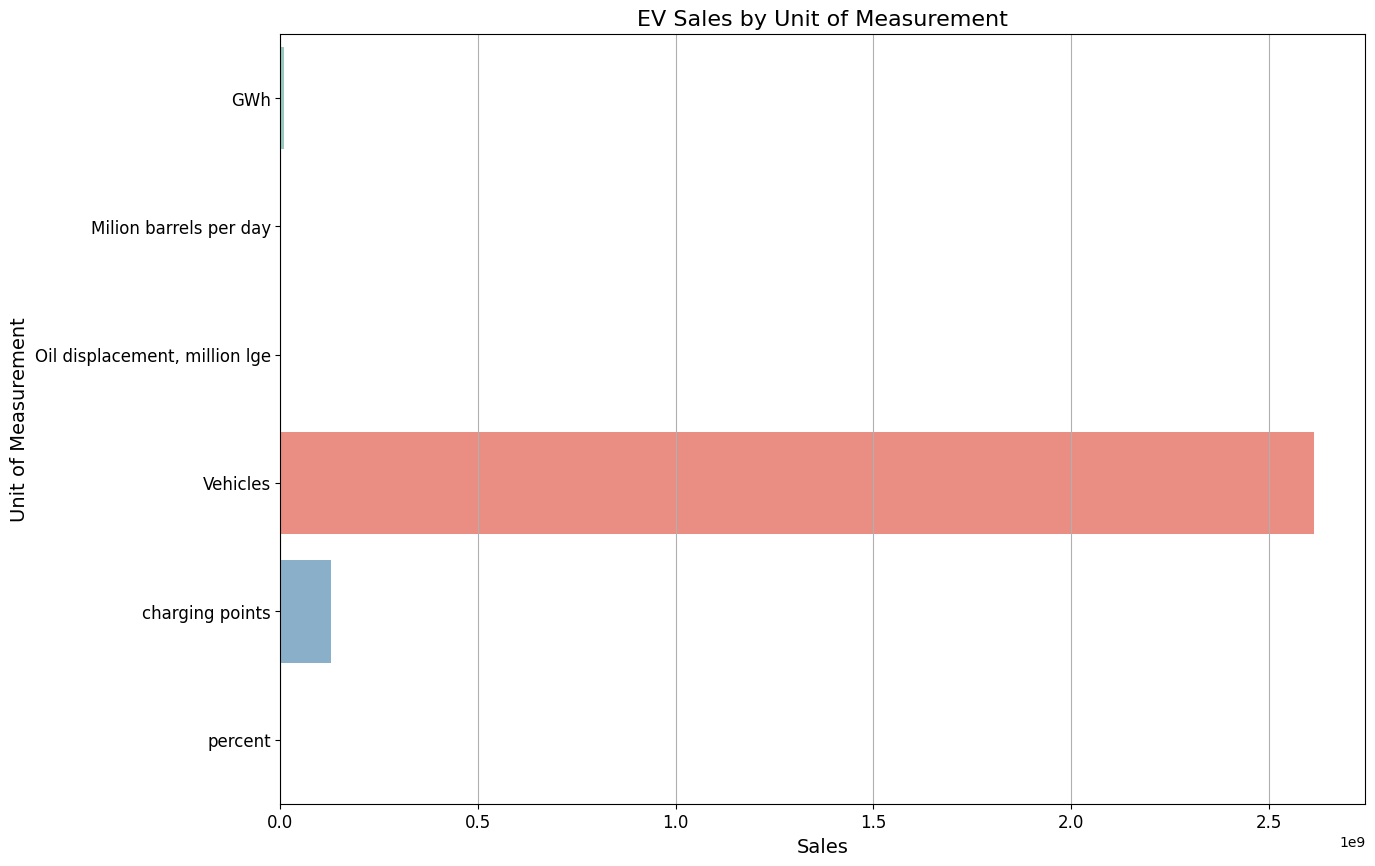

In [25]:
# Aggregate sales by unit of measurement
sales_by_unit = df.groupby('unit')['value'].sum().reset_index()

# Plot bar chart for sales by unit of measurement
plt.figure(figsize=(14, 10))
sns.barplot(x='value', y='unit', data=sales_by_unit, palette='Set3')
plt.title('EV Sales by Unit of Measurement', fontsize=16)
plt.xlabel('Sales', fontsize=14)
plt.ylabel('Unit of Measurement', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x')
plt.show()

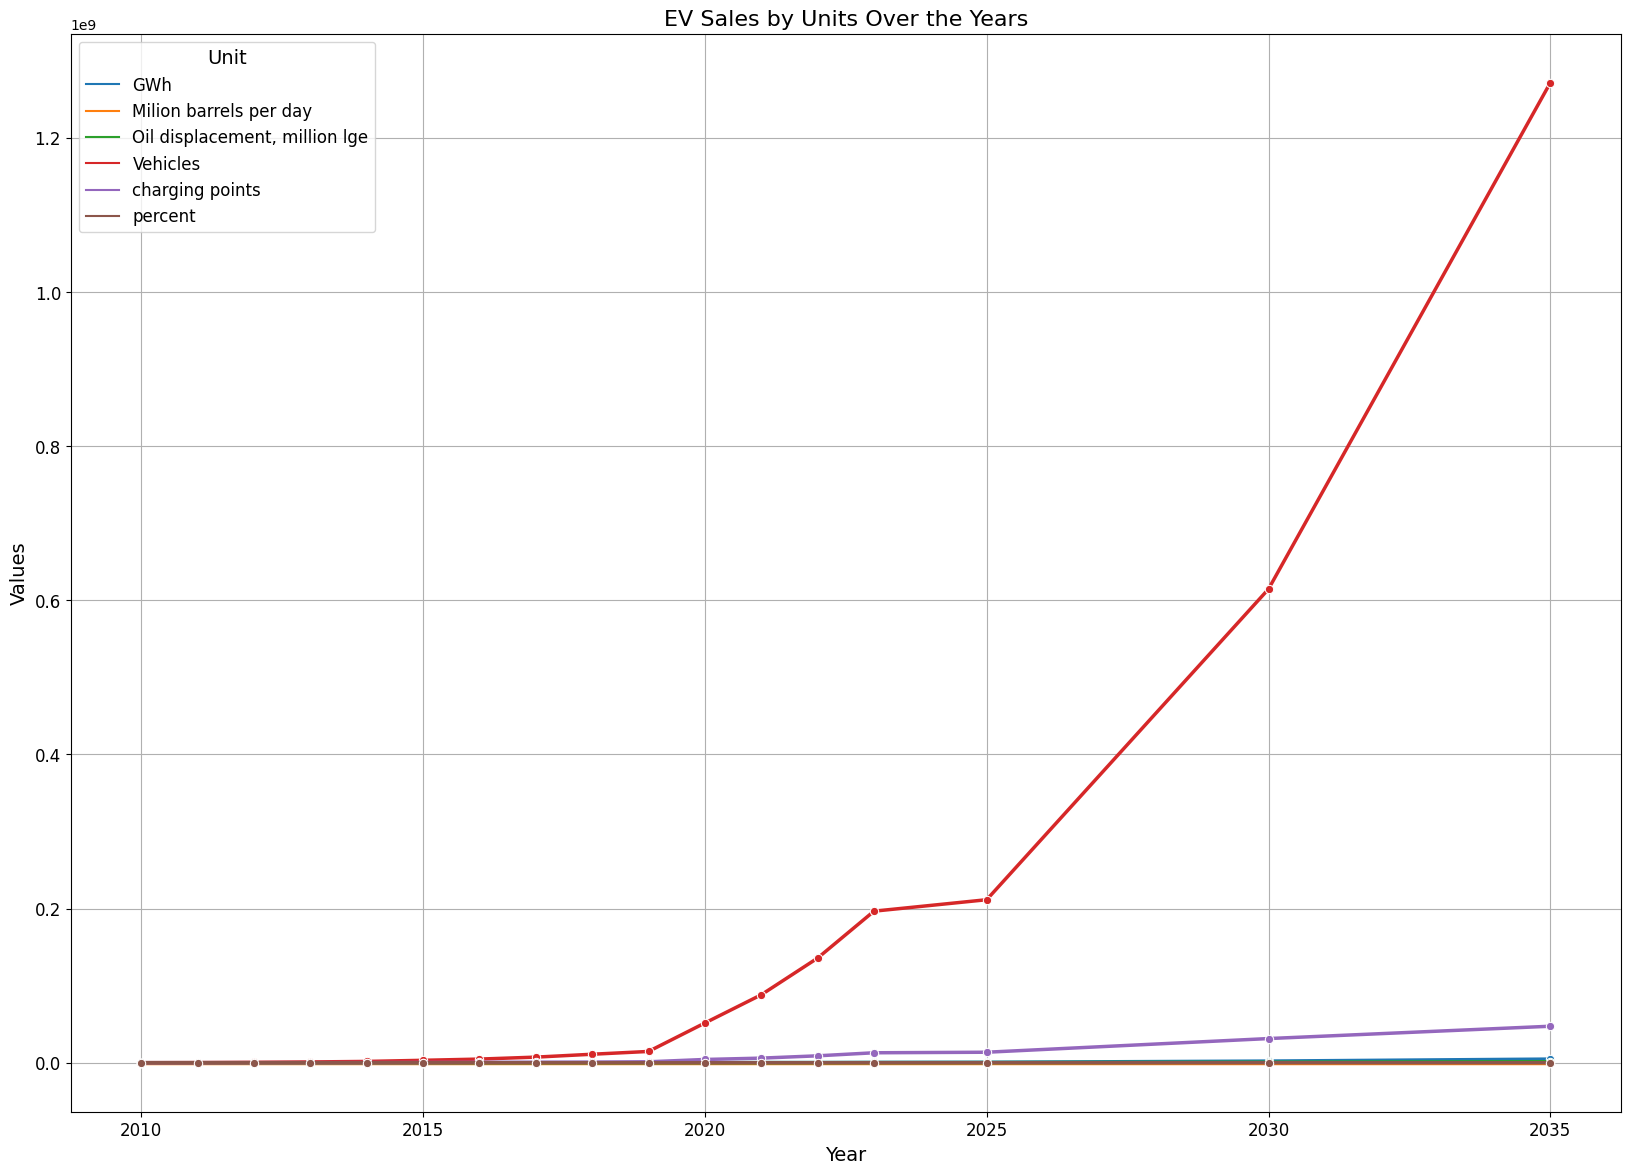

In [26]:
# Aggregate sales by unit of measurement and year
sales_by_unit_year = df.groupby(['unit', 'year'])['value'].sum().reset_index()

# Plot line chart
plt.figure(figsize=(20, 14))
sns.lineplot(x='year', y='value', hue='unit', data=sales_by_unit_year, marker='o', linewidth=2.5, palette='tab10')
plt.title('EV Sales by Units Over the Years', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Values', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Unit', fontsize=12, title_fontsize=14)
plt.grid(True)
plt.show()

How does the usage of different units impact the interpretation of data?

1. Overview of Units

In [27]:
# Display unique units in the dataset
unique_units = df['unit'].unique()
print("Unique Units:", unique_units)

Unique Units: ['percent' 'Vehicles' 'charging points' 'GWh' 'Milion barrels per day'
 'Oil displacement, million lge']


Visualizing Metrics with Different Units

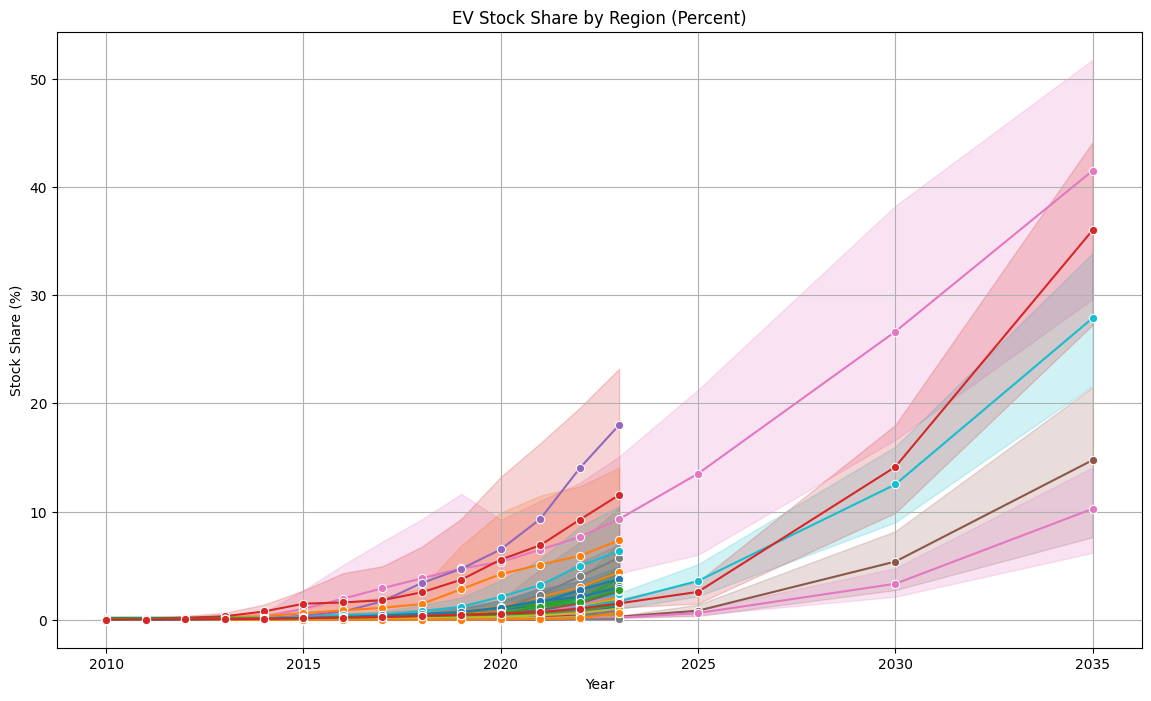

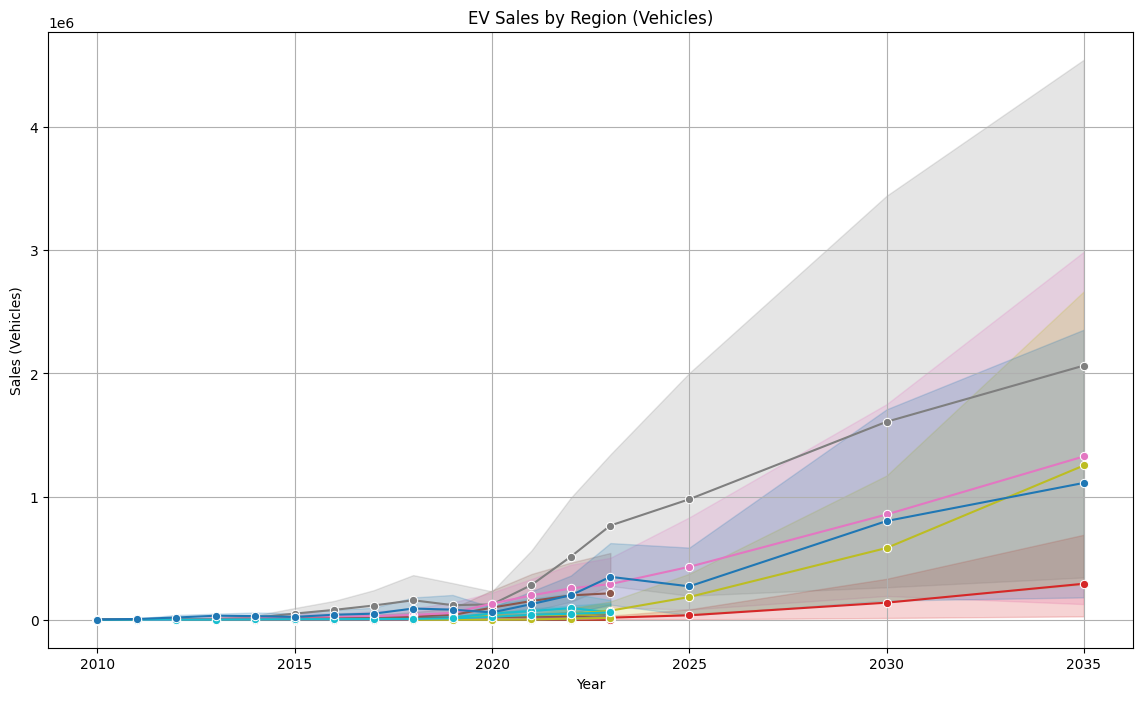

In [28]:
# Filter data for different units
ev_stock_share = df[df['parameter'] == 'EV stock share']
ev_sales_share = df[df['parameter'] == 'EV sales share']
ev_sales = df[df['parameter'] == 'EV sales']
ev_stock = df[df['parameter'] == 'EV stock']

# Plot EV stock share and sales share
plt.figure(figsize=(14, 8))
sns.lineplot(data=ev_stock_share, x='year', y='value', hue='region', marker='o', palette='tab10', legend=False)
plt.title('EV Stock Share by Region (Percent)')
plt.xlabel('Year')
plt.ylabel('Stock Share (%)')
plt.grid(True)
plt.show()

plt.figure(figsize=(14, 8))
sns.lineplot(data=ev_sales_share, x='year', y='value', hue='region', marker='o', palette='tab10', legend=False)
plt.title('EV Sales Share by Region (Percent)')
plt.xlabel('Year')
plt.ylabel('Sales Share (%)')
plt.grid(True)
plt.show()

# Plot EV sales and stock
plt.figure(figsize=(14, 8))
sns.lineplot(data=ev_sales, x='year', y='value', hue='region', marker='o', palette='tab10', legend=False)
plt.title('EV Sales by Region (Vehicles)')
plt.xlabel('Year')
plt.ylabel('Sales (Vehicles)')
plt.grid(True)
plt.show()

plt.figure(figsize=(14, 8))
sns.lineplot(data=ev_stock, x='year', y='value', hue='region', marker='o', palette='tab10', legend=False)
plt.title('EV Stock by Region (Vehicles)')
plt.xlabel('Year')
plt.ylabel('Stock (Vehicles)')
plt.grid(True)
plt.show()

Identifying Trends in Oil Displacement or Electricity Demand Correlated with EV Sales or Stock

1. Analyzing Oil Displacement

In [29]:
# Filter data for oil displacement metrics
oil_displacement = df[df['parameter'].isin(['Oil displacement Mbd', 'Oil displacement, million lge'])]

# Group data by year and parameter
oil_displacement_grouped = oil_displacement.groupby(['year', 'parameter']).agg({'value': 'sum'}).reset_index()

# Plot oil displacement trends
plt.figure(figsize=(14, 8))
sns.lineplot(data=oil_displacement_grouped, x='year', y='value', hue='parameter', marker='o', palette='coolwarm')
plt.title('Oil Displacement Trends')
plt.xlabel('Year')
plt.ylabel('Oil Displacement')
plt.grid(True)
plt.show()

2. Analyzing Electricity Demand

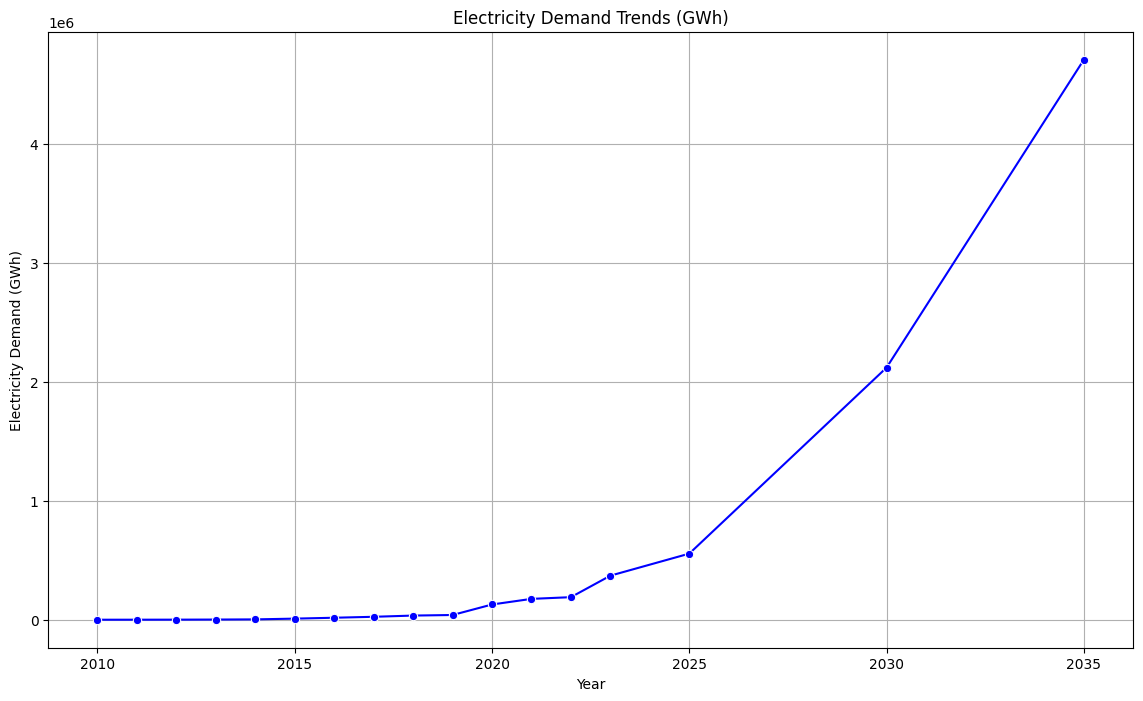

In [30]:
# Filter data for electricity demand
electricity_demand = df[df['parameter'] == 'Electricity demand']

# Group data by year
electricity_demand_grouped = electricity_demand.groupby(['year']).agg({'value': 'sum'}).reset_index()

# Plot electricity demand trends
plt.figure(figsize=(14, 8))
sns.lineplot(data=electricity_demand_grouped, x='year', y='value', marker='o', color='b')
plt.title('Electricity Demand Trends (GWh)')
plt.xlabel('Year')
plt.ylabel('Electricity Demand (GWh)')
plt.grid(True)
plt.show()

3. Correlation with EV Sales and Stock

Correlation Matrix:
                                          year     value            \
parameter                                      EV sales  EV stock   
      parameter                                                     
year                                 1.000000  0.922660  0.838337   
value EV sales                       0.922660  1.000000  0.959495   
      EV stock                       0.838337  0.959495  1.000000   
      Electricity demand             0.812728  0.940848  0.997727   
      Oil displacement Mbd           0.832800  0.956376  0.999279   
      Oil displacement, million lge  0.834056  0.957386  0.999171   

                                                                             \
parameter                           Electricity demand Oil displacement Mbd   
      parameter                                                               
year                                          0.812728             0.832800   
value EV sales                           

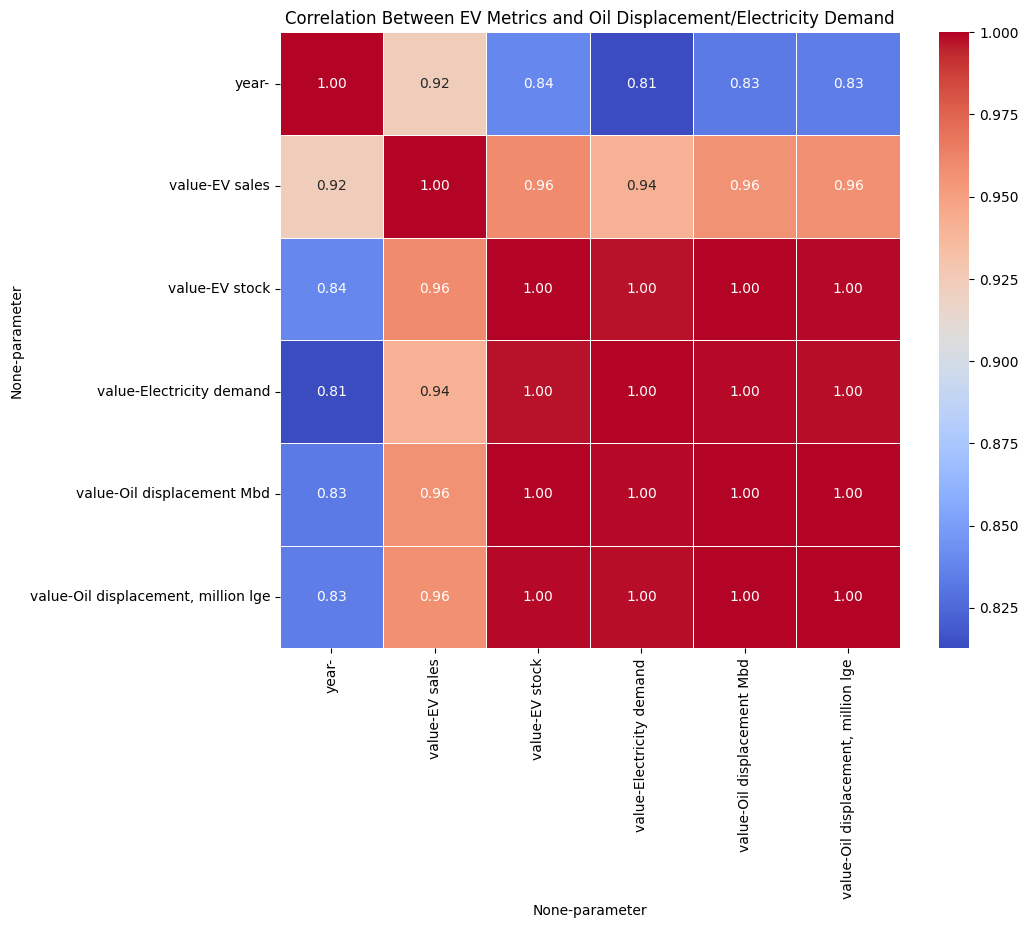

In [31]:
# Merge relevant data for correlation analysis
ev_metrics = df[df['parameter'].isin(['EV sales', 'EV stock'])]
oil_elec_metrics = df[df['parameter'].isin(['Oil displacement Mbd', 'Oil displacement, million lge', 'Electricity demand'])]

# Group data by year and parameter for merging
ev_metrics_grouped = ev_metrics.groupby(['year', 'parameter']).agg({'value': 'sum'}).unstack().reset_index()
oil_elec_metrics_grouped = oil_elec_metrics.groupby(['year', 'parameter']).agg({'value': 'sum'}).unstack().reset_index()

# Merge the datasets
correlation_data = pd.merge(ev_metrics_grouped, oil_elec_metrics_grouped, on='year', suffixes=('_ev', '_oil_elec'))

# Calculate correlation matrix
correlation_matrix = correlation_data.corr()

# Display correlation matrix
print("Correlation Matrix:\n", correlation_matrix)

# Plot heatmap for correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Between EV Metrics and Oil Displacement/Electricity Demand')
plt.show()

# Mode-Specific Analysis

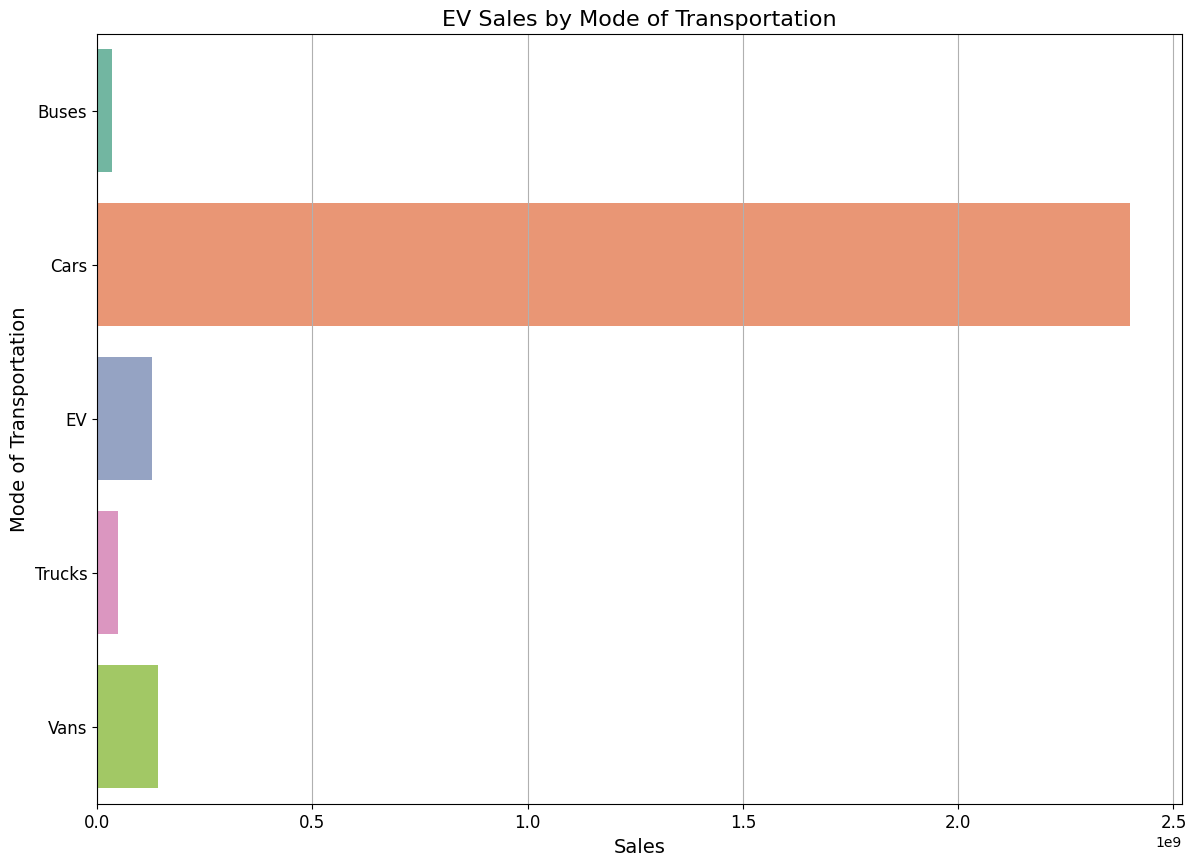

In [32]:
# Aggregate sales by mode of transportation
sales_by_mode = df.groupby('mode')['value'].sum().reset_index()

# Plot bar chart for sales by mode of transportation
plt.figure(figsize=(14, 10))
sns.barplot(x='value', y='mode', data=sales_by_mode, palette='Set2')
plt.title('EV Sales by Mode of Transportation', fontsize=16)
plt.xlabel('Sales', fontsize=14)
plt.ylabel('Mode of Transportation', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x')
plt.show()

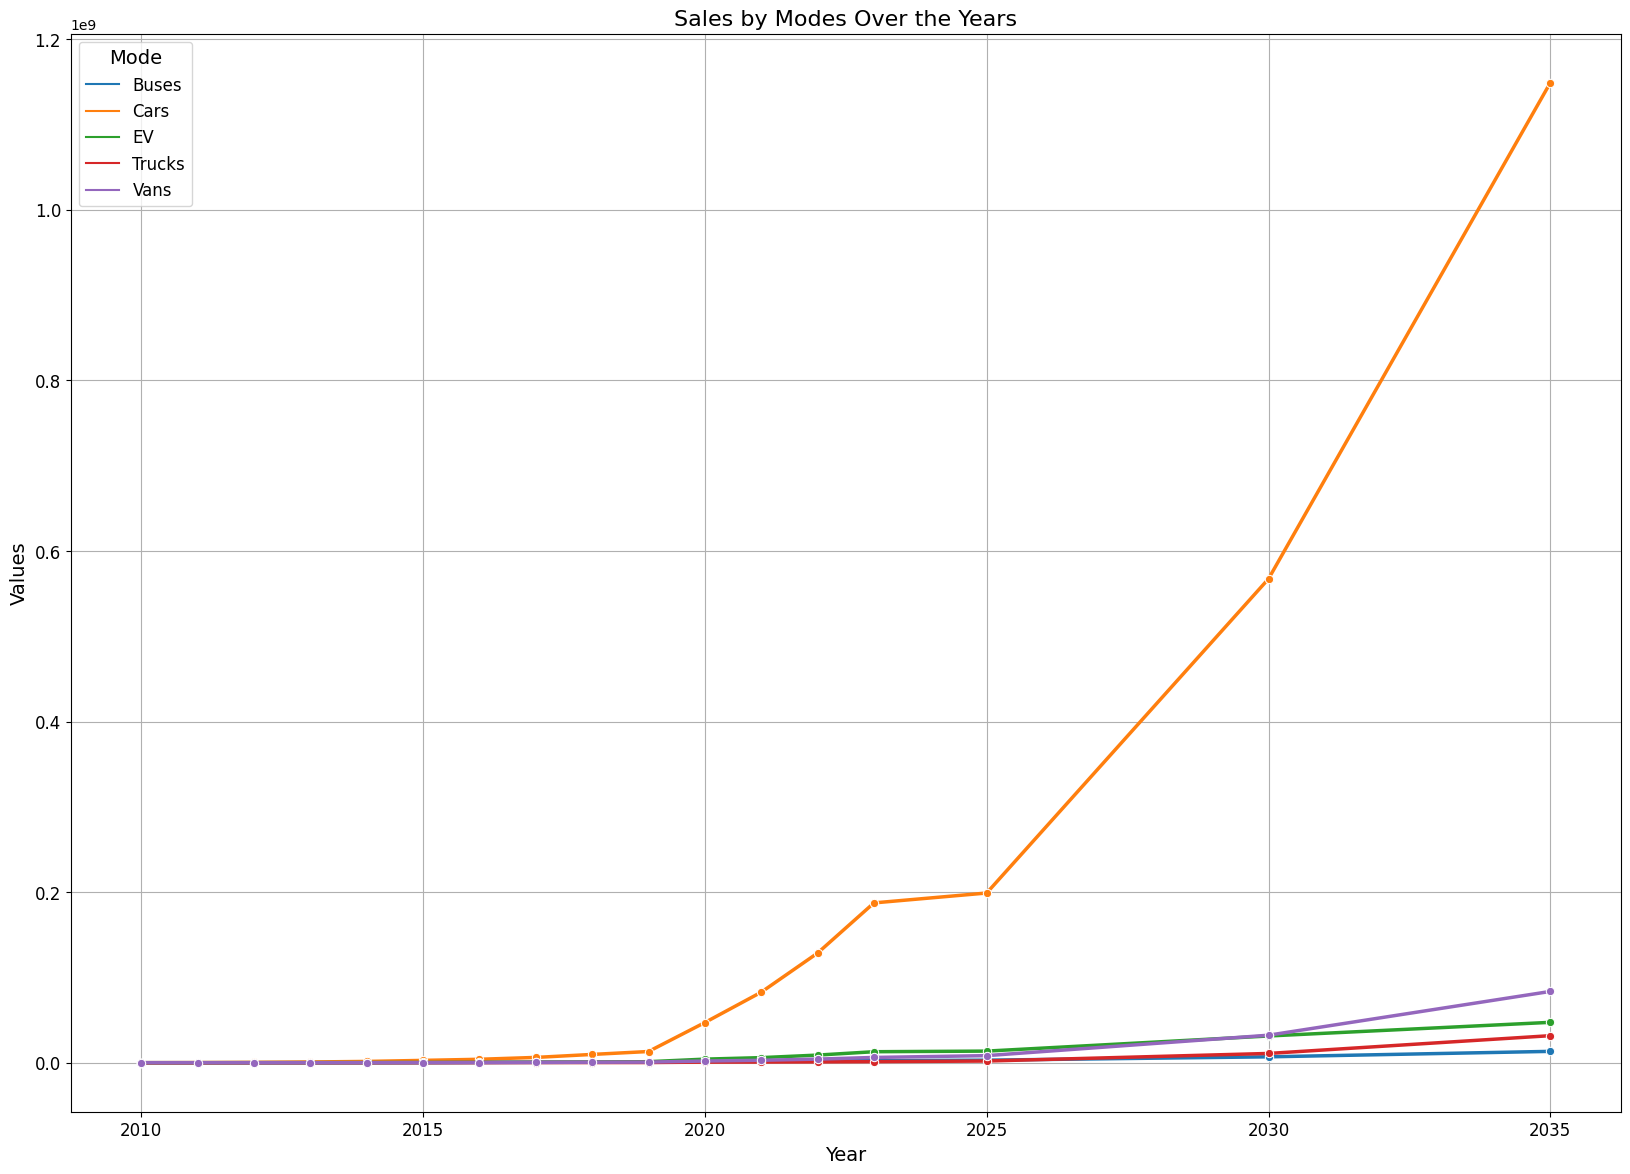

In [33]:
# Aggregate sales by mode of transportation and year
sales_by_mode_year = df.groupby(['mode', 'year'])['value'].sum().reset_index()

# Plot line chart
plt.figure(figsize=(20, 14))
sns.lineplot(x='year', y='value', hue='mode', data=sales_by_mode_year, marker='o', linewidth=2.5, palette='tab10')
plt.title('Sales by Modes Over the Years', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Values', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Mode', fontsize=12, title_fontsize=14)
plt.grid(True)
plt.show()

How do EV adoption trends differ between cars, buses, vans, and trucks?

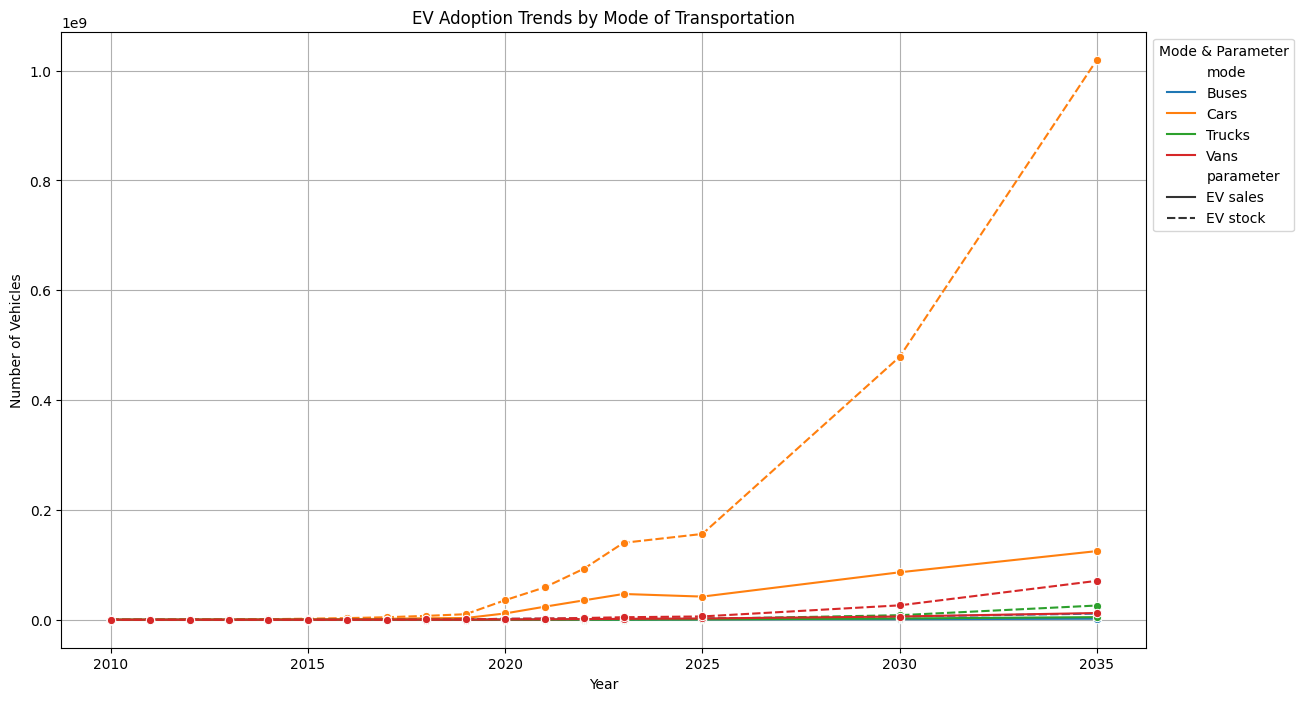

In [34]:
# Filter data for EV sales and stock by mode of transportation
ev_by_mode = df[df['mode'].isin(['Cars', 'Buses', 'Vans', 'Trucks']) & df['parameter'].isin(['EV sales', 'EV stock'])]

# Group data by year, mode, and parameter to analyze trends
mode_trends = ev_by_mode.groupby(['year', 'mode', 'parameter']).agg({'value': 'sum'}).reset_index()

# Plot EV adoption trends by mode of transportation
plt.figure(figsize=(14, 8))
sns.lineplot(data=mode_trends, x='year', y='value', hue='mode', style='parameter', marker='o', palette='tab10')
plt.title('EV Adoption Trends by Mode of Transportation')
plt.xlabel('Year')
plt.ylabel('Number of Vehicles')
plt.legend(title='Mode & Parameter', loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

Which modes of transportation have seen the most significant growth in EV adoption?
- Analyzing Growth Rates

  - We'll calculate the Compound Annual Growth Rate (CAGR) for each mode to quantify growth.

In [35]:
# Define a function to calculate CAGR
def calculate_cagr(initial_value, final_value, num_years):
    return (final_value / initial_value) ** (1 / num_years) - 1

# Calculate CAGR for each mode
growth_analysis = []
for mode in ['Cars', 'Buses', 'Vans', 'Trucks']:
    mode_data = mode_trends[mode_trends['mode'] == mode]
    initial_year = mode_data['year'].min()
    final_year = mode_data['year'].max()
    
    # Calculate CAGR for sales and stock
    initial_sales = mode_data[(mode_data['year'] == initial_year) & (mode_data['parameter'] == 'EV sales')]['value'].sum()
    final_sales = mode_data[(mode_data['year'] == final_year) & (mode_data['parameter'] == 'EV sales')]['value'].sum()
    sales_cagr = calculate_cagr(initial_sales, final_sales, final_year - initial_year)
    
    initial_stock = mode_data[(mode_data['year'] == initial_year) & (mode_data['parameter'] == 'EV stock')]['value'].sum()
    final_stock = mode_data[(mode_data['year'] == final_year) & (mode_data['parameter'] == 'EV stock')]['value'].sum()
    stock_cagr = calculate_cagr(initial_stock, final_stock, final_year - initial_year)
    
    growth_analysis.append({
        'Mode': mode,
        'Sales CAGR (%)': sales_cagr * 100,
        'Stock CAGR (%)': stock_cagr * 100
    })

# Convert to DataFrame
growth_df = pd.DataFrame(growth_analysis)

EV Adoption Growth Rates by Mode of Transportation:
     Mode  Sales CAGR (%)  Stock CAGR (%)
0    Cars       45.839364       51.380331
1   Buses       33.736929       32.132754
2    Vans       37.314275       39.558781
3  Trucks       54.011293       45.622712


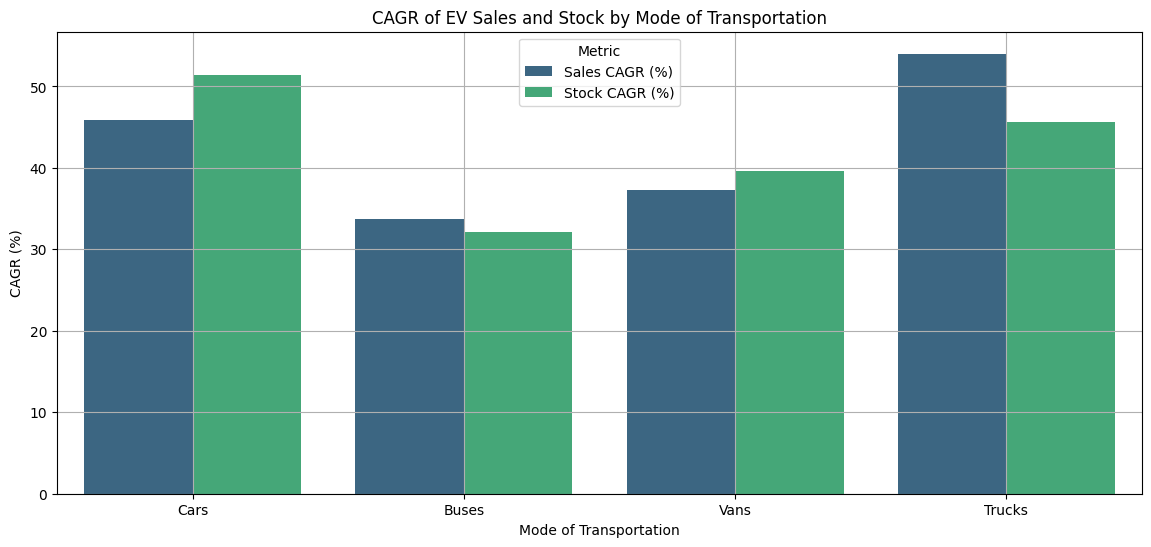

In [36]:
# Display growth rates
print("EV Adoption Growth Rates by Mode of Transportation:")
print(growth_df)

# Plot growth rates
plt.figure(figsize=(14, 6))
sns.barplot(data=growth_df.melt(id_vars='Mode'), x='Mode', y='value', hue='variable', palette='viridis')
plt.title('CAGR of EV Sales and Stock by Mode of Transportation')
plt.ylabel('CAGR (%)')
plt.xlabel('Mode of Transportation')
plt.legend(title='Metric')
plt.grid(True)
plt.show()

How EV adoption trends differ by mode across various regions

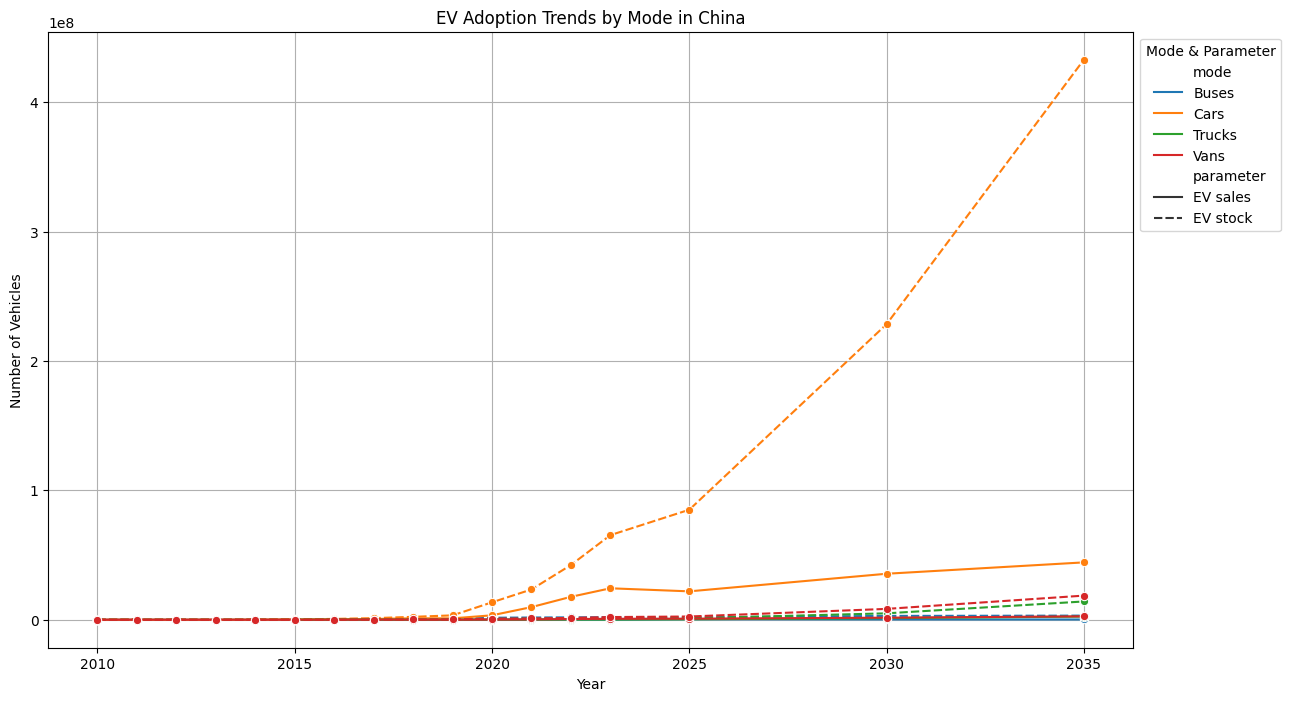

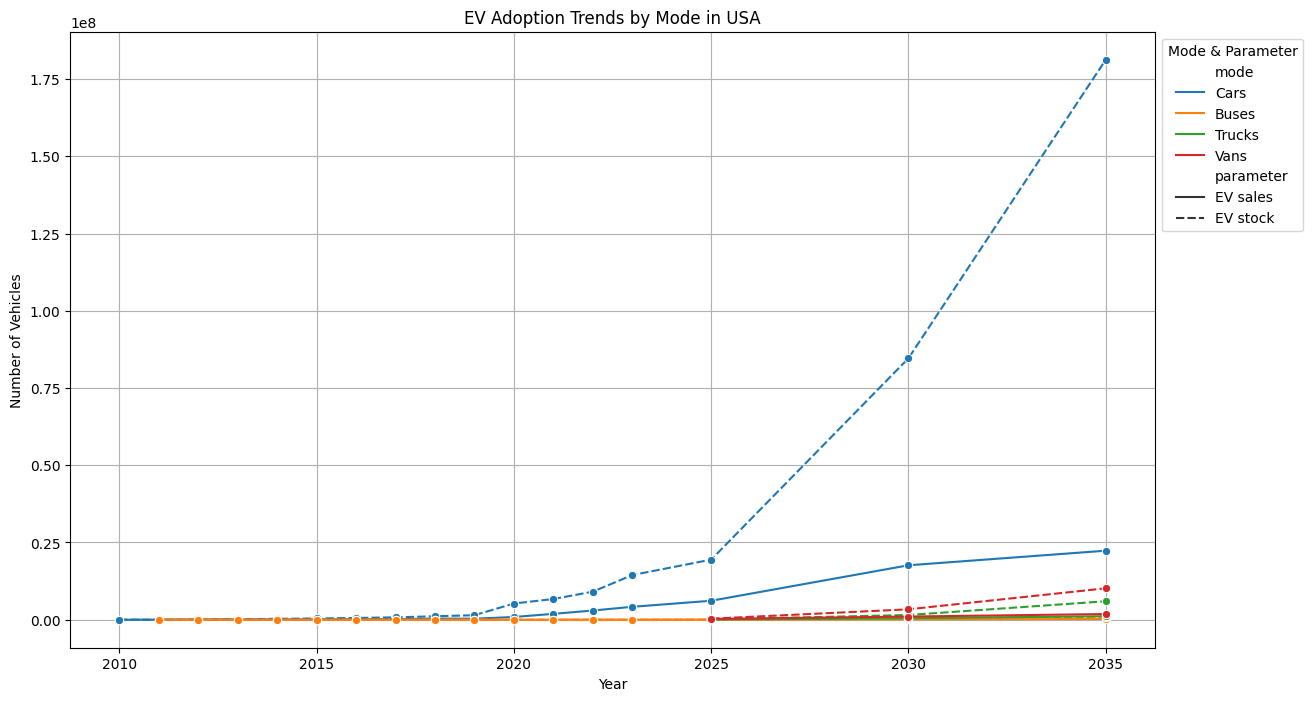

In [37]:
# Filter data for regional analysis of EV adoption by mode
regional_ev_mode = df[df['mode'].isin(['Cars', 'Buses', 'Vans', 'Trucks']) & df['parameter'].isin(['EV sales', 'EV stock'])]

# Group data by region, year, mode, and parameter
regional_ev_mode_grouped = regional_ev_mode.groupby(['region', 'year', 'mode', 'parameter']).agg({'value': 'sum'}).reset_index()

# Plot regional differences in EV adoption by mode
regions_of_interest = ['Europe', 'China', 'USA']
for region in regions_of_interest:
    regional_data = regional_ev_mode_grouped[regional_ev_mode_grouped['region'] == region]
    plt.figure(figsize=(14, 8))
    sns.lineplot(data=regional_data, x='year', y='value', hue='mode', style='parameter', marker='o', palette='tab10')
    plt.title(f'EV Adoption Trends by Mode in {region}')
    plt.xlabel('Year')
    plt.ylabel('Number of Vehicles')
    plt.legend(title='Mode & Parameter', loc='upper left', bbox_to_anchor=(1, 1))
    plt.grid(True)
    plt.show()

# Powertrain Analysis

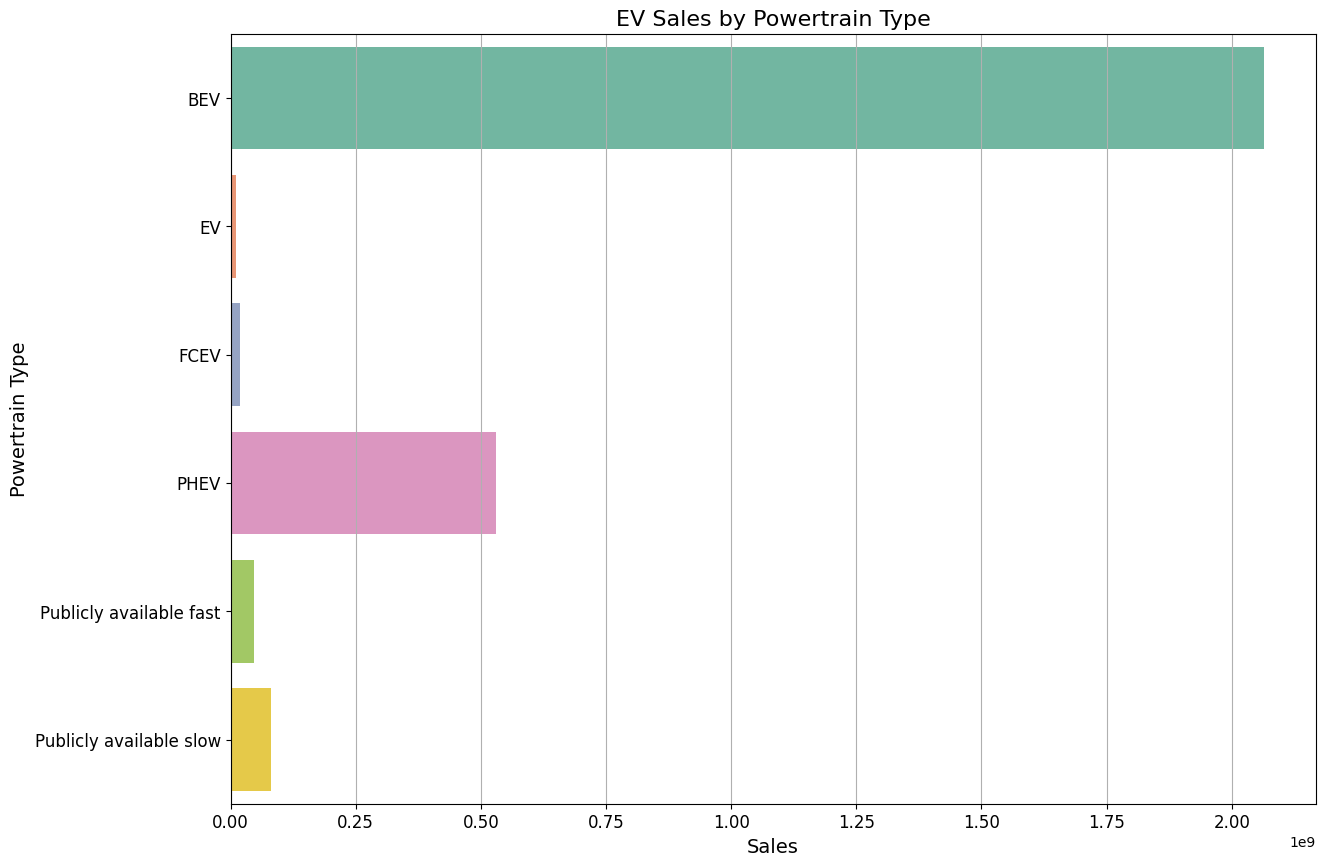

In [38]:
# Aggregate sales by powertrain type
sales_by_powertrain = df.groupby('powertrain')['value'].sum().reset_index()

# Plot bar chart for sales by powertrain type
plt.figure(figsize=(14, 10))
sns.barplot(x='value', y='powertrain', data=sales_by_powertrain, palette='Set2')
plt.title('EV Sales by Powertrain Type', fontsize=16)
plt.xlabel('Sales', fontsize=14)
plt.ylabel('Powertrain Type', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x')
plt.show()

In [39]:
# Aggregate sales by powertrain type and year
sales_by_powertrain_year = df.groupby(['powertrain', 'year'])['value'].sum().reset_index()

# Plot line chart
plt.figure(figsize=(20, 14))
sns.lineplot(x='year', y='value', hue='powertrain', data=sales_by_powertrain_year, marker='o', linewidth=2.5, palette='tab10')
plt.title('EV Sales by Powertrains Over the Years', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Values', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Powertrain', fontsize=12, title_fontsize=14)
plt.grid(True)
plt.show()

Trends in the Adoption of Different Powertrains (BEV, PHEV, FCEV)

In [40]:
# Filter data for powertrain preferences
powertrain_adoption = df[df['powertrain'].isin(['BEV', 'PHEV', 'FCEV']) & df['parameter'].isin(['EV sales', 'EV stock'])]

# Group data by year and powertrain to analyze trends
powertrain_trends = powertrain_adoption.groupby(['year', 'powertrain', 'parameter']).agg({'value': 'sum'}).reset_index()

# Plot trends in the adoption of different powertrains
plt.figure(figsize=(14, 8))
sns.lineplot(data=powertrain_trends, x='year', y='value', hue='powertrain', style='parameter', marker='o', palette='tab10')
plt.title('Trends in the Adoption of Different Powertrains (BEV, PHEV, FCEV)')
plt.xlabel('Year')
plt.ylabel('Number of Vehicles')
plt.legend(title='Powertrain & Parameter', loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

# Parameter

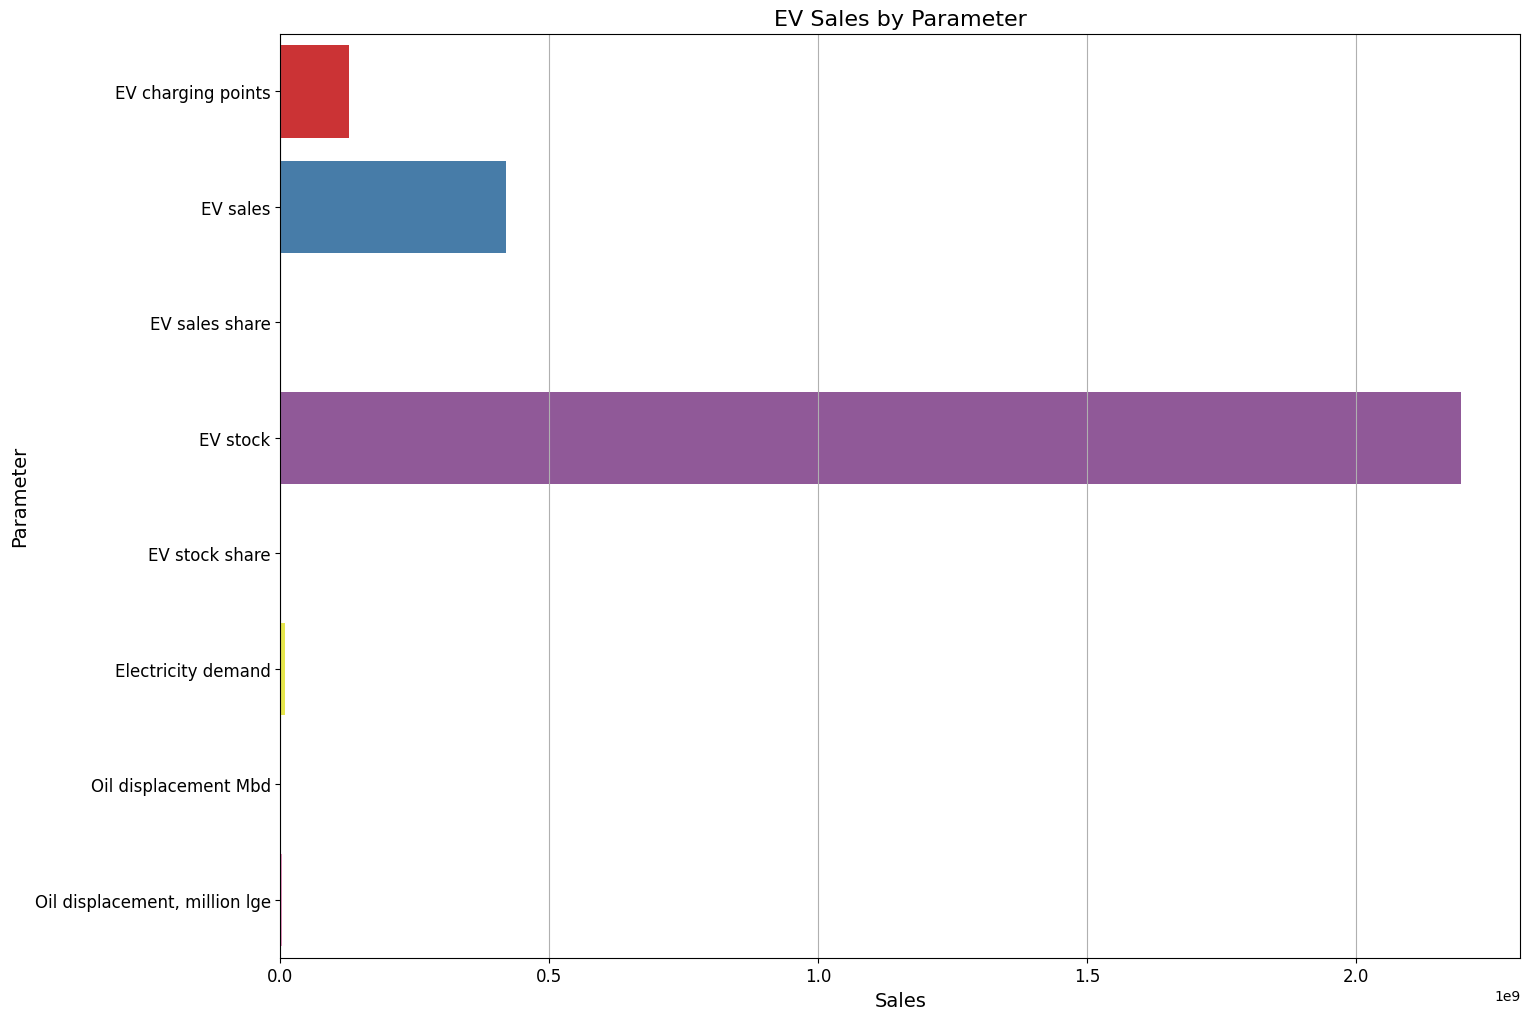

In [41]:
# Aggregate sales by parameter
sales_by_parameter = df.groupby('parameter')['value'].sum().reset_index()

# Plot bar chart for sales by parameter
plt.figure(figsize=(16, 12))
sns.barplot(x='value', y='parameter', data=sales_by_parameter, palette='Set1')
plt.title('EV Sales by Parameter', fontsize=16)
plt.xlabel('Sales', fontsize=14)
plt.ylabel('Parameter', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x')
plt.show()

In [42]:
# Aggregate sales by parameter and year
sales_by_parameter_year = df.groupby(['parameter', 'year'])['value'].sum().reset_index()

# Plot line chart
plt.figure(figsize=(20, 14))
sns.lineplot(x='year', y='value', hue='parameter', data=sales_by_parameter_year, marker='o', linewidth=2.5, palette='tab10')
plt.title('EV Sales by Parameters Over the Years', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Values', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Parameter', fontsize=12, title_fontsize=14)
plt.grid(True)
plt.show()